In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
data=pd.read_csv("crime_data (1).csv")
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
data.iloc[:,1:4].head()

,Murder,Assault,UrbanPop
0,13.2,236,58
1,10.0,263,48
2,8.1,294,80
3,8.8,190,50
4,9.0,276,91


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df=scaler.fit_transform(data.iloc[:,1:4])
scaled_df=pd.DataFrame(df,columns=data.iloc[:,1:4].columns)
scaled_df.head()

,Murder,Assault,UrbanPop
0,0.746988,0.654110,0.440678
1,0.554217,0.746575,0.271186
2,0.439759,0.852740,0.813559
3,0.481928,0.496575,0.305085
4,0.493976,0.791096,1.000000


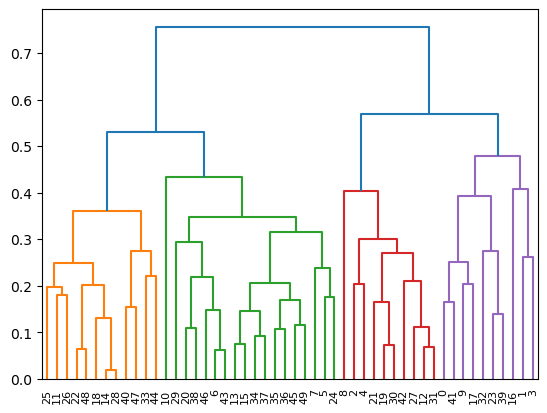

In [6]:
dendrogram = sch.dendrogram(sch.linkage(scaled_df, method = 'average'))

In [7]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'average')
y_hc = hc.fit_predict(scaled_df)
clusters=pd.DataFrame(y_hc,columns=['clusters'])
clusters

,clusters
0,1
1,1
2,2
3,1
4,2
5,0
6,0
7,0
8,2
9,1


In [8]:
scaled_df['h_clusterid'] = clusters
scaled_df

,Murder,Assault,UrbanPop,h_clusterid
0,0.746988,0.654110,0.440678,1
1,0.554217,0.746575,0.271186,1
2,0.439759,0.852740,0.813559,2
3,0.481928,0.496575,0.305085,1
4,0.493976,0.791096,1.000000,2
5,0.427711,0.544521,0.779661,0
6,0.150602,0.222603,0.762712,0
7,0.307229,0.660959,0.677966,0
8,0.879518,0.993151,0.813559,2
9,1.000000,0.568493,0.474576,1


In [9]:
from sklearn.cluster import KMeans

In [10]:
wcss = []

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(scaled_df)
wcss.append(kmeans.inertia_)

wcss

[4.2583397927501165]

In [11]:
kmeans.labels_

array([0, 0, 2, 0, 2, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 0, 0, 1, 2, 1, 2,
       1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 1,
       1, 1, 1, 1, 1, 1])

In [12]:
scaled_df = pd.DataFrame(scaled_df)

scaled_df['cluster_3'] = kmeans.labels_

scaled_df.head()

,Murder,Assault,UrbanPop,h_clusterid,cluster_3
0,0.746988,0.654110,0.440678,1,0
1,0.554217,0.746575,0.271186,1,0
2,0.439759,0.852740,0.813559,2,2
3,0.481928,0.496575,0.305085,1,0
4,0.493976,0.791096,1.000000,2,2


C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


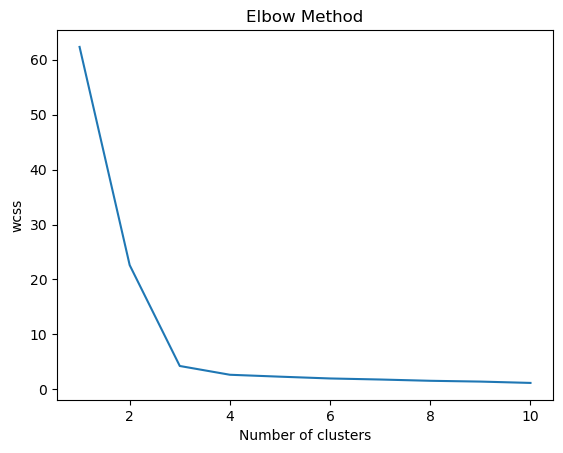

In [13]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [14]:
wcss

[62.31388318162875,
 22.615056302047247,
 4.2583397927501165,
 2.660735709762127,
 2.312934299576792,
 1.9867328775452922,
 1.7959740753167708,
 1.5635944300352458,
 1.4190580995440754,
 1.1755558333306637]

In [15]:
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(scaled_df)

KMeans(n_clusters=3, random_state=42)

In [16]:
clusters_new.labels_

array([2, 2, 1, 2, 1, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 2, 2, 0, 1, 0, 1,
       0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 0])

In [17]:
data['clusterid_new'] = clusters_new.labels_
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,2


In [18]:
from sklearn.cluster import DBSCAN

In [23]:
dbscan = DBSCAN(eps=0.6, min_samples=6)
dbscan.fit(scaled_df)
dbscan.labels_

array([0, 0, 1, 0, 1, 2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 2, 0, 0, 2, 1, 2, 1,
       2, 0, 2, 2, 2, 1, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2,
       2, 2, 2, 2, 2, 2], dtype=int64)

In [24]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,0
2,1
3,0
4,1
5,2
6,2
7,2
8,1
9,0


In [26]:
clustered = pd.concat([scaled_df,cl],axis=1)
clustered[clustered['cluster']==1]

,Murder,Assault,UrbanPop,h_clusterid,cluster_3,cluster
2,0.439759,0.852740,0.813559,2,2,1
4,0.493976,0.791096,1.000000,2,2,1
8,0.879518,0.993151,0.813559,2,2,1
12,0.578313,0.698630,0.864407,2,2,1
19,0.632530,0.873288,0.593220,2,2,1
21,0.680723,0.719178,0.711864,2,2,1
27,0.686747,0.708904,0.830508,2,2,1
30,0.638554,0.821918,0.644068,2,2,1
31,0.620482,0.715753,0.915254,2,2,1
42,0.716867,0.534247,0.813559,2,2,1


In [27]:
clustered

,Murder,Assault,UrbanPop,h_clusterid,cluster_3,cluster
0,0.746988,0.654110,0.440678,1,0,0
1,0.554217,0.746575,0.271186,1,0,0
2,0.439759,0.852740,0.813559,2,2,1
3,0.481928,0.496575,0.305085,1,0,0
4,0.493976,0.791096,1.000000,2,2,1
5,0.427711,0.544521,0.779661,0,1,2
6,0.150602,0.222603,0.762712,0,1,2
7,0.307229,0.660959,0.677966,0,1,2
8,0.879518,0.993151,0.813559,2,2,1
9,1.000000,0.568493,0.474576,1,0,0
